In [2]:
import pandas as pd
from aspect_based_sentiment_analysis import Sentiment

# Create a DataFrame
df = pd.read_excel('C:/Users/Pratik/OneDrive/Desktop/capstone_airline_reviews3.xlsx')

df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
null_values_df = df.isnull()

# Check if all values in each row are True (indicating all null values)
entries_with_null = null_values_df.all(axis=1)

# Filter the original DataFrame to get the entries with all null values
entries_with_all_null = df[entries_with_null]

print(entries_with_all_null)

       airline  overall author review_date customer_review aircraft  \
0          NaN      NaN    NaN         NaN             NaN      NaN   
2          NaN      NaN    NaN         NaN             NaN      NaN   
4          NaN      NaN    NaN         NaN             NaN      NaN   
6          NaN      NaN    NaN         NaN             NaN      NaN   
8          NaN      NaN    NaN         NaN             NaN      NaN   
...        ...      ...    ...         ...             ...      ...   
131885     NaN      NaN    NaN         NaN             NaN      NaN   
131887     NaN      NaN    NaN         NaN             NaN      NaN   
131889     NaN      NaN    NaN         NaN             NaN      NaN   
131891     NaN      NaN    NaN         NaN             NaN      NaN   
131893     NaN      NaN    NaN         NaN             NaN      NaN   

       traveller_type cabin route date_flown  seat_comfort  cabin_service  \
0                 NaN   NaN   NaN        NaN           NaN            

In [4]:
# Get the indices of the entries with all null values
indices_to_remove = entries_with_null[entries_with_null].index

# Drop the entries with all null values from the original DataFrame
df_cleaned = df.drop(indices_to_remove)

print(df_cleaned)

                      airline  overall               author  \
1            Turkish Airlines      7.0  Christopher Hackley   
3            Turkish Airlines      2.0        Adriana Pisoi   
5            Turkish Airlines      3.0            M Galerko   
7            Turkish Airlines     10.0          Zeshan Shah   
9            Turkish Airlines      1.0           Pooja Jain   
...                       ...      ...                  ...   
131886  Ukraine International      NaN  Yevheniy Kahanovych   
131888  Ukraine International      NaN            Helen Lee   
131890  Ukraine International      NaN     Andriy Yesypenko   
131892  Ukraine International      NaN    Volodya Bilotkach   
131894  Ukraine International      NaN      Kasper Hettinga   

               review_date                                    customer_review  \
1             8th May 2019  âœ… Trip Verified | London to Izmir via Istanb...   
3             7th May 2019  âœ… Trip Verified | Istanbul to Bucharest. We ...   


In [5]:
# Create a boolean Series indicating null values in the 'customer_review' column
review_null_values_df = df_cleaned['customer_review'].isnull()

# Filter the cleaned DataFrame to get rows where 'customer_review' is null
review_null_rows = df_cleaned[review_null_values_df]

# Print the subset of rows where 'customer_review' is null
print(review_null_rows)

Empty DataFrame
Columns: [airline, overall, author, review_date, customer_review, aircraft, traveller_type, cabin, route, date_flown, seat_comfort, cabin_service, food_bev, entertainment, ground_service, value_for_money, recommended]
Index: []


In [6]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re


# Load the NLTK sentiment analyzer
sia = SentimentIntensityAnalyzer()


In [9]:
import nltk
nltk.download('stopwords')
# Preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing to the review text
df_cleaned['preprocessed_review'] = df_cleaned['customer_review'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pratik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Apply sentiment analysis to each review
def analyze_sentiment(text):
    return sia.polarity_scores(text)['compound']

# Apply sentiment analysis to the preprocessed review text
df_cleaned['sentiment_score'] = df_cleaned['preprocessed_review'].apply(analyze_sentiment)


In [12]:
df_cleaned

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,preprocessed_review,sentiment_score
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes,âœ trip verified london izmir via istanbul fir...,0.9403
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no,âœ trip verified istanbul bucharest make check...,0.2732
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no,âœ trip verified rome prishtina via istanbul f...,-0.9515
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,âœ trip verified flew turkish airlines iadistk...,0.9764
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no,âœ trip verified mumbai dublin via istanbul ne...,-0.2654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,two domestic flights kiev lviv last week troub...,0.7963
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,good flight london kiev ukraine international ...,0.7351
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,kiev london gatwick business class april flown...,0.1523
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,several flights kbp ams 3 times one way lgw rt...,0.3818


In [47]:
# Define aspects to analyze
aspects = ['seat_comfort', 'cabin_service', 'food_bev','entertainment','ground_service','value_for_money']  # Add more as needed

# Calculate average sentiment score for each aspect
aspect_sentiments = {}
for aspect in aspects:
    aspect_sentiments[aspect] = df_cleaned[df_cleaned[aspect].notnull()].groupby('airline')[['sentiment_score']].mean()


In [14]:
# Print aspect-based sentiment analysis results
for aspect, sentiment_df in aspect_sentiments.items():
    print(f"Aspect: {aspect}")
    print(sentiment_df)
    print()


Aspect: seat_comfort
                           sentiment_score
airline                                   
ANA All Nippon Airways            0.713757
Adria Airways                     0.530590
Aegean Airlines                   0.639473
Aer Lingus                        0.424566
Aeroflot Russian Airlines         0.475871
...                                    ...
WOW air                           0.302360
Wizz Air                          0.007163
airBaltic                         0.174859
easyJet                           0.305871
flydubai                         -0.090516

[81 rows x 1 columns]

Aspect: cabin_service
                           sentiment_score
airline                                   
ANA All Nippon Airways            0.713757
Adria Airways                     0.530590
Aegean Airlines                   0.636977
Aer Lingus                        0.428627
Aeroflot Russian Airlines         0.478264
...                                    ...
WOW air                       

In [15]:
sentiment_df

,sentiment_score
airline,
ANA All Nippon Airways,0.716486
Adria Airways,0.574724
Aegean Airlines,0.632710
Aer Lingus,0.447915
Aeroflot Russian Airlines,0.452306
...,...
WOW air,0.287178
Wizz Air,0.046790
airBaltic,0.219770


In [16]:
aspect_scores = pd.DataFrame()
for aspect in aspects:
    aspect_scores[aspect] = df_cleaned[df_cleaned[aspect].notnull()].groupby('airline')['sentiment_score'].mean()

# Merge the aspect scores with the original dataframe based on the airline
result_df = df_cleaned.merge(aspect_scores, left_on='airline', right_index=True)

# Display the resulting dataframe
print(result_df)

                      airline  overall               author  \
1            Turkish Airlines      7.0  Christopher Hackley   
3            Turkish Airlines      2.0        Adriana Pisoi   
5            Turkish Airlines      3.0            M Galerko   
7            Turkish Airlines     10.0          Zeshan Shah   
9            Turkish Airlines      1.0           Pooja Jain   
...                       ...      ...                  ...   
131886  Ukraine International      NaN  Yevheniy Kahanovych   
131888  Ukraine International      NaN            Helen Lee   
131890  Ukraine International      NaN     Andriy Yesypenko   
131892  Ukraine International      NaN    Volodya Bilotkach   
131894  Ukraine International      NaN      Kasper Hettinga   

               review_date                                    customer_review  \
1             8th May 2019  âœ… Trip Verified | London to Izmir via Istanb...   
3             7th May 2019  âœ… Trip Verified | Istanbul to Bucharest. We ...   


In [17]:
result_df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,...,value_for_money_x,recommended,preprocessed_review,sentiment_score,seat_comfort_y,cabin_service_y,food_bev_y,entertainment_y,ground_service_y,value_for_money_y
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,...,4.0,yes,âœ trip verified london izmir via istanbul fir...,0.9403,0.306293,0.308132,0.330203,0.338321,0.227686,0.304167
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,...,1.0,no,âœ trip verified istanbul bucharest make check...,0.2732,0.306293,0.308132,0.330203,0.338321,0.227686,0.304167
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,...,2.0,no,âœ trip verified rome prishtina via istanbul f...,-0.9515,0.306293,0.308132,0.330203,0.338321,0.227686,0.304167
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,...,5.0,yes,âœ trip verified flew turkish airlines iadistk...,0.9764,0.306293,0.308132,0.330203,0.338321,0.227686,0.304167
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,...,1.0,no,âœ trip verified mumbai dublin via istanbul ne...,-0.2654,0.306293,0.308132,0.330203,0.338321,0.227686,0.304167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,...,NaN,no,two domestic flights kiev lviv last week troub...,0.7963,0.122180,0.122180,0.153009,0.032395,0.037021,0.146291
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,...,NaN,no,good flight london kiev ukraine international ...,0.7351,0.122180,0.122180,0.153009,0.032395,0.037021,0.146291
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,...,NaN,no,kiev london gatwick business class april flown...,0.1523,0.122180,0.122180,0.153009,0.032395,0.037021,0.146291
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,...,NaN,no,several flights kbp ams 3 times one way lgw rt...,0.3818,0.122180,0.122180,0.153009,0.032395,0.037021,0.146291


In [18]:
aspect_scores

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
airline,,,,,,
ANA All Nippon Airways,0.713757,0.713757,0.715177,0.714627,0.785435,0.716486
Adria Airways,0.530590,0.530590,0.661703,0.655725,0.347861,0.574724
Aegean Airlines,0.639473,0.636977,0.660268,0.680428,0.682557,0.632710
Aer Lingus,0.424566,0.428627,0.451355,0.433040,0.332158,0.447915
Aeroflot Russian Airlines,0.475871,0.478264,0.495875,0.493240,0.387072,0.452306
...,...,...,...,...,...,...
WOW air,0.302360,0.303717,0.270647,0.251302,0.266282,0.287178
Wizz Air,0.007163,0.012256,0.015441,-0.153036,-0.036135,0.046790
airBaltic,0.174859,0.167299,0.222422,-0.049730,0.195242,0.219770


In [19]:
final_score = aspect_scores.merge(sentiment_df, left_on='airline', right_index=True)

In [20]:
final_score

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,sentiment_score
airline,,,,,,,
ANA All Nippon Airways,0.713757,0.713757,0.715177,0.714627,0.785435,0.716486,0.716486
Adria Airways,0.530590,0.530590,0.661703,0.655725,0.347861,0.574724,0.574724
Aegean Airlines,0.639473,0.636977,0.660268,0.680428,0.682557,0.632710,0.632710
Aer Lingus,0.424566,0.428627,0.451355,0.433040,0.332158,0.447915,0.447915
Aeroflot Russian Airlines,0.475871,0.478264,0.495875,0.493240,0.387072,0.452306,0.452306
...,...,...,...,...,...,...,...
WOW air,0.302360,0.303717,0.270647,0.251302,0.266282,0.287178,0.287178
Wizz Air,0.007163,0.012256,0.015441,-0.153036,-0.036135,0.046790,0.046790
airBaltic,0.174859,0.167299,0.222422,-0.049730,0.195242,0.219770,0.219770


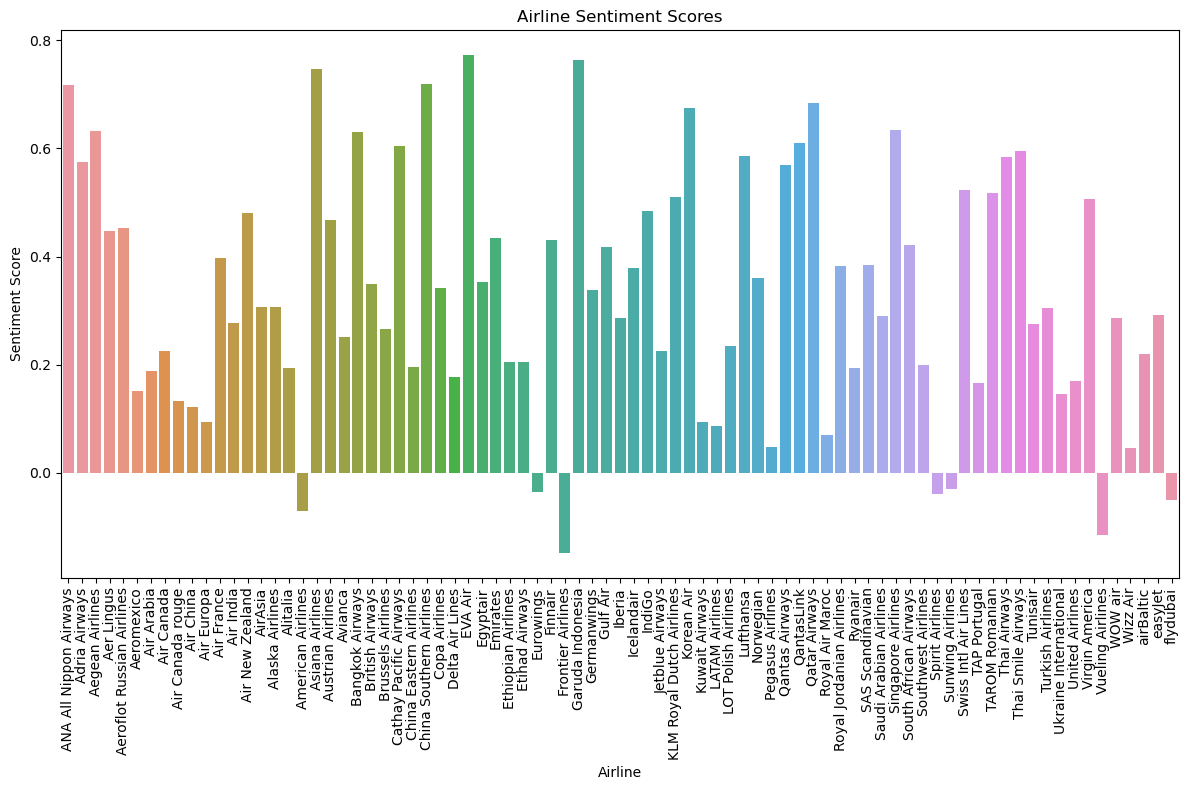

In [22]:
import seaborn as sns

# Assuming 'final_score' is the dataframe containing the data
plt.figure(figsize=(12, 8))
sns.barplot(x=final_score.index, y=final_score['sentiment_score'])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Airline')
plt.ylabel('Sentiment Score')
plt.title('Airline Sentiment Scores')
plt.tight_layout()

plt.show()


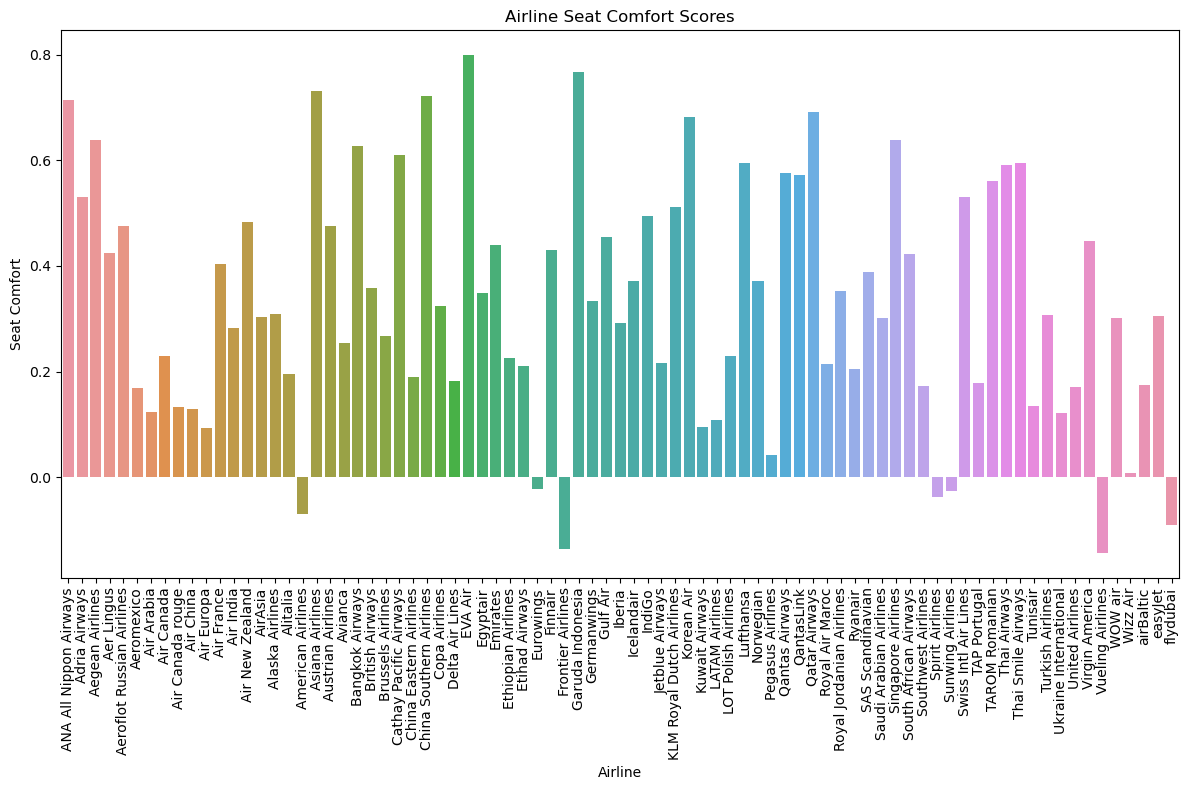

In [28]:
# Assuming 'final_score' is the dataframe containing the data
plt.figure(figsize=(12, 8))
sns.barplot(x=final_score.index, y=final_score['seat_comfort'])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Airline')
plt.ylabel('Seat Comfort')
plt.title('Airline Seat Comfort Scores')
plt.tight_layout()

plt.show()


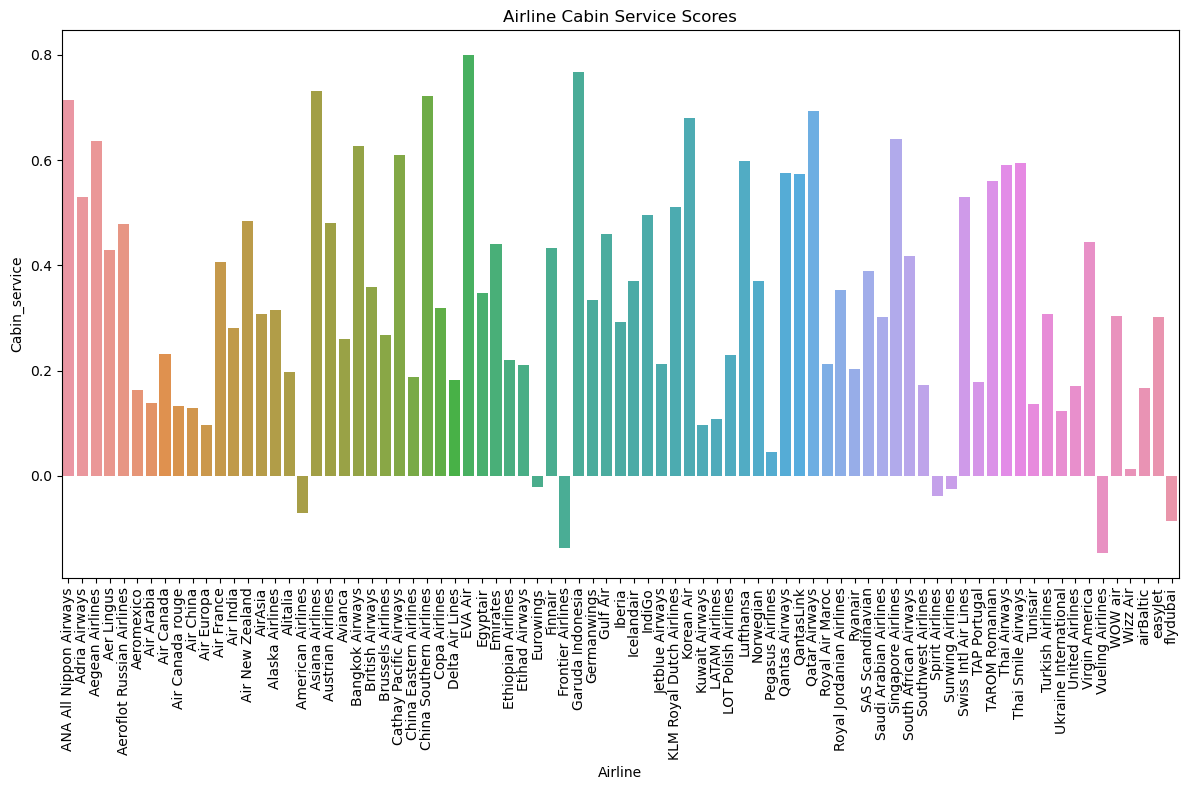

In [23]:
# Assuming 'final_score' is the dataframe containing the data
plt.figure(figsize=(12, 8))
sns.barplot(x=final_score.index, y=final_score['cabin_service'])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Airline')
plt.ylabel('Cabin_service')
plt.title('Airline Cabin Service Scores')
plt.tight_layout()

plt.show()


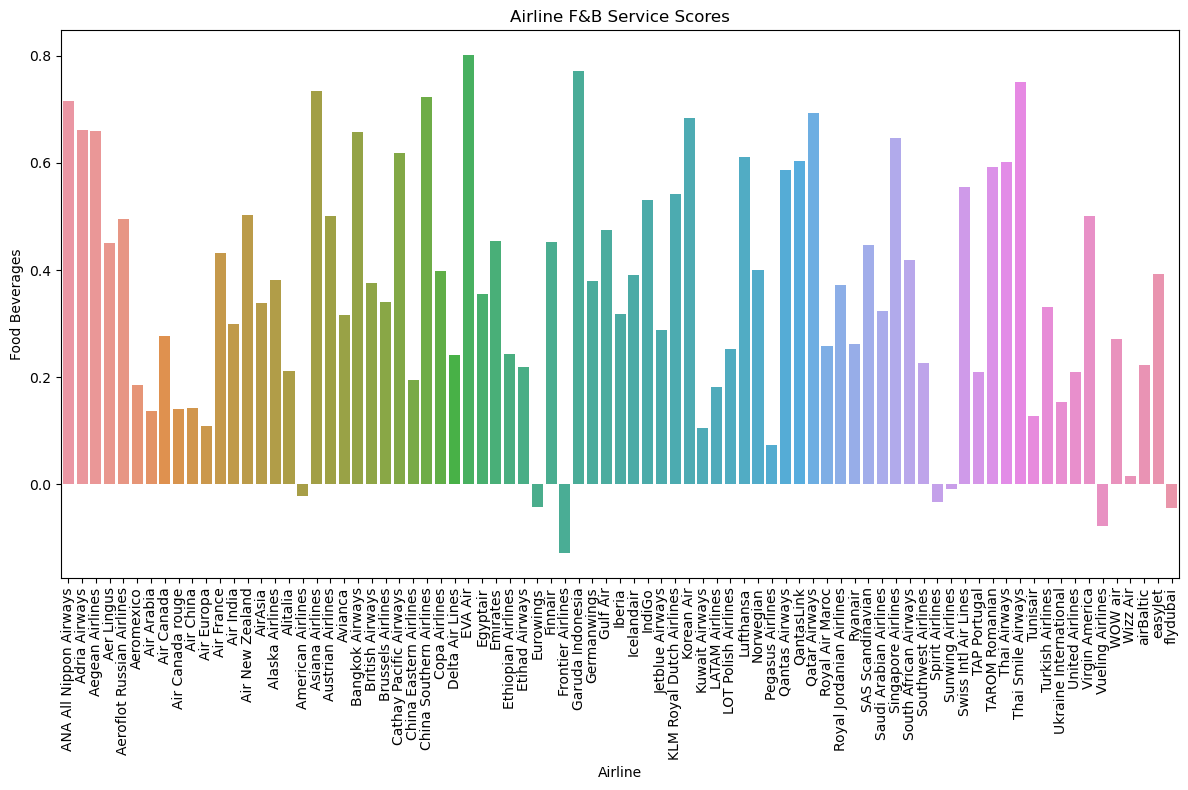

In [24]:
# Assuming 'final_score' is the dataframe containing the data
plt.figure(figsize=(12, 8))
sns.barplot(x=final_score.index, y=final_score['food_bev'])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Airline')
plt.ylabel('Food Beverages')
plt.title('Airline F&B Service Scores')
plt.tight_layout()

plt.show()


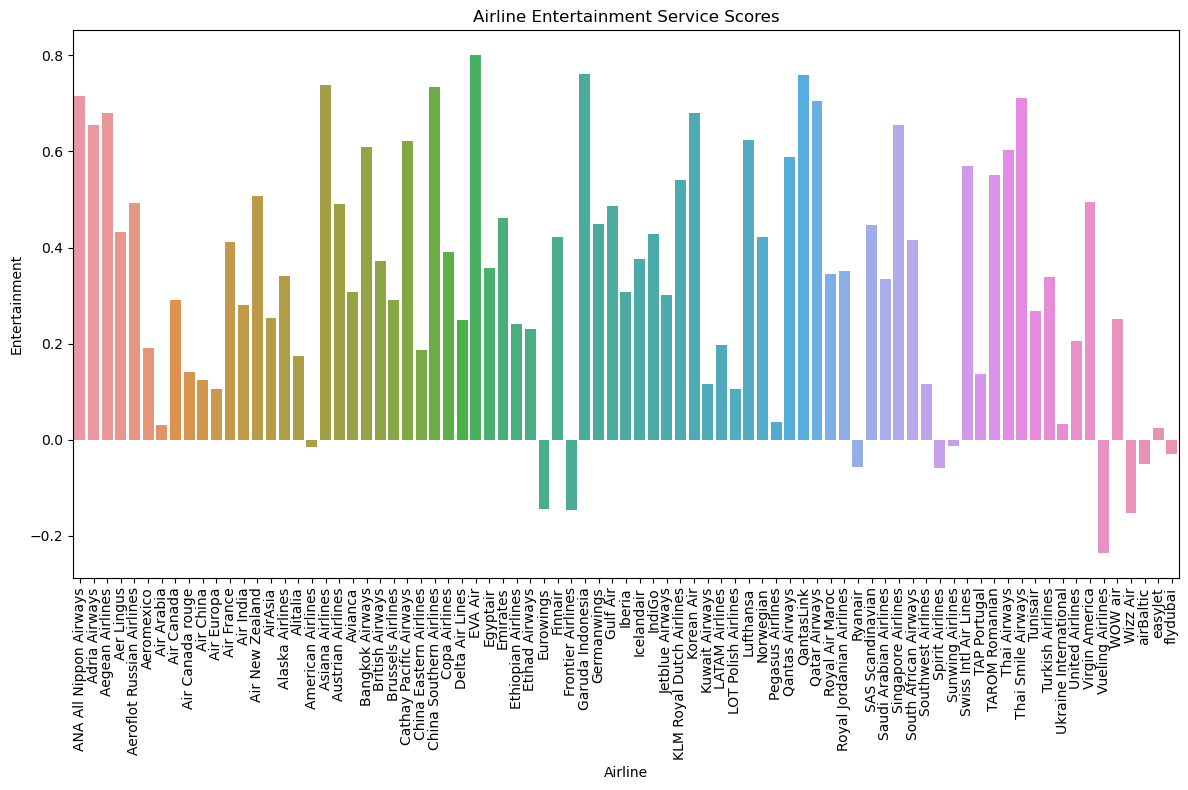

In [25]:
# Assuming 'final_score' is the dataframe containing the data
plt.figure(figsize=(12, 8))
sns.barplot(x=final_score.index, y=final_score['entertainment'])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Airline')
plt.ylabel('Entertainment')
plt.title('Airline Entertainment Service Scores')
plt.tight_layout()

plt.show()


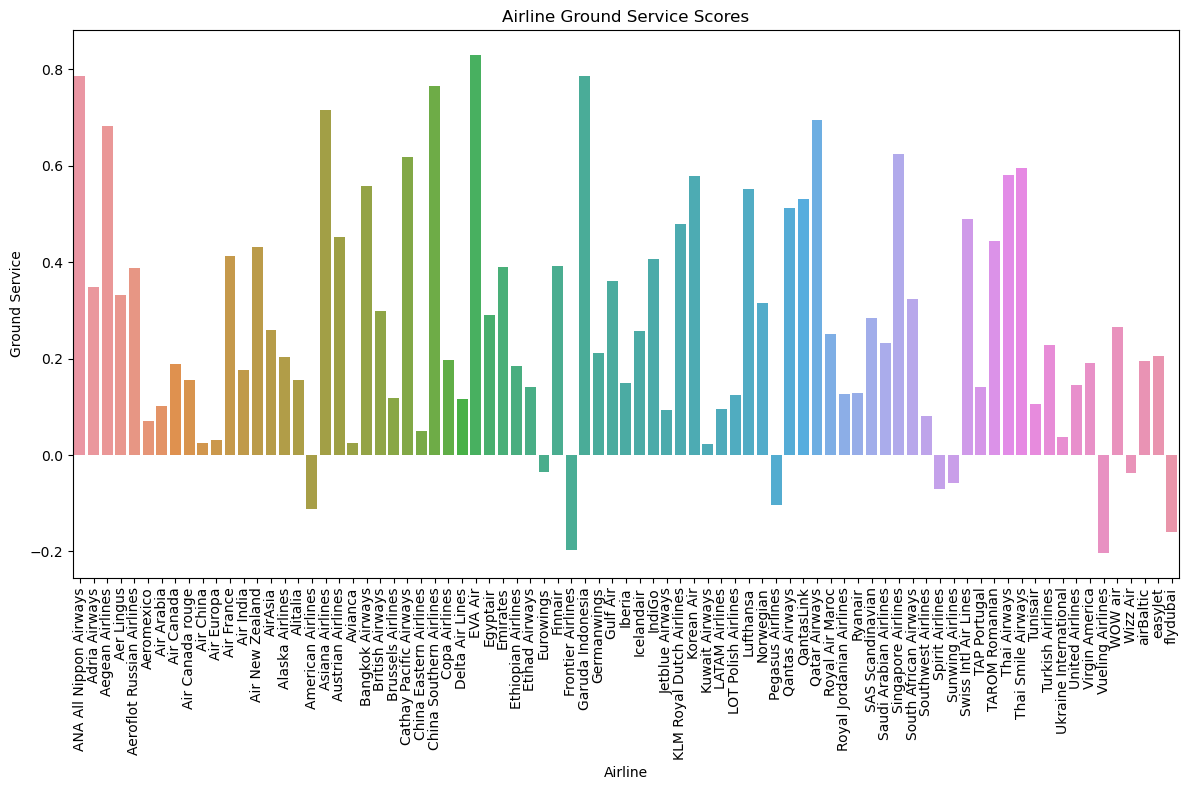

In [26]:
# Assuming 'final_score' is the dataframe containing the data
plt.figure(figsize=(12, 8))
sns.barplot(x=final_score.index, y=final_score['ground_service'])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Airline')
plt.ylabel('Ground Service')
plt.title('Airline Ground Service Scores')
plt.tight_layout()

plt.show()


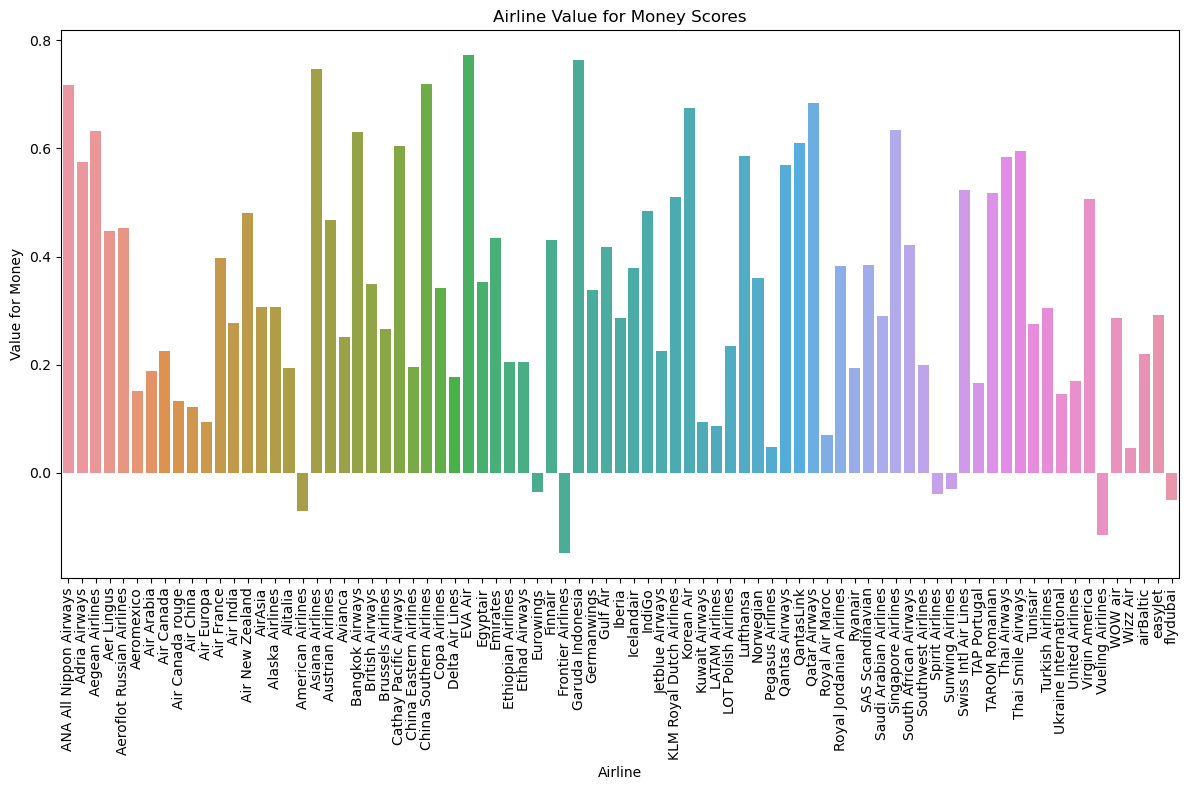

In [27]:
# Assuming 'final_score' is the dataframe containing the data
plt.figure(figsize=(12, 8))
sns.barplot(x=final_score.index, y=final_score['value_for_money'])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Airline')
plt.ylabel('Value for Money')
plt.title('Airline Value for Money Scores')
plt.tight_layout()

plt.show()


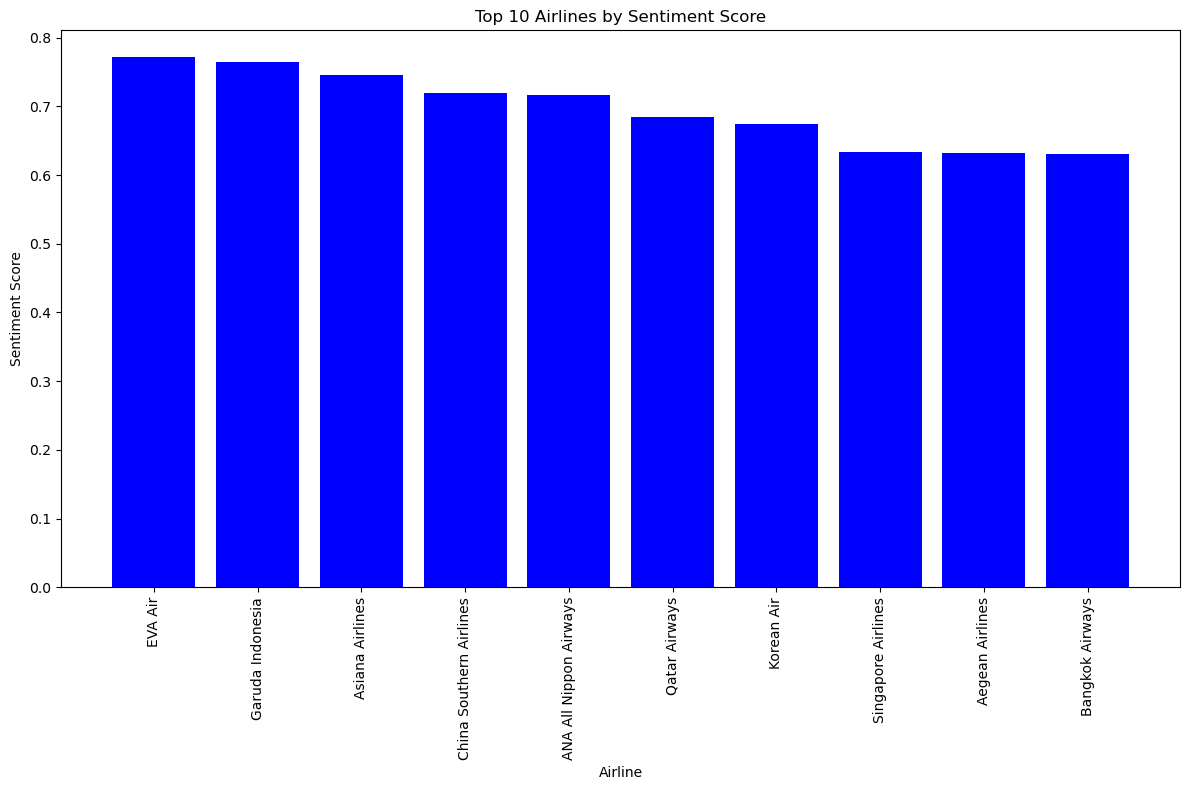

In [29]:
import matplotlib.pyplot as plt

# Get the top 10 airlines based on sentiment scores
top_10_airlines = final_score.nlargest(10, 'sentiment_score')

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(top_10_airlines.index, top_10_airlines['sentiment_score'], color='blue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Airline')
plt.ylabel('Sentiment Score')
plt.title('Top 10 Airlines by Sentiment Score')
plt.tight_layout()

plt.show()


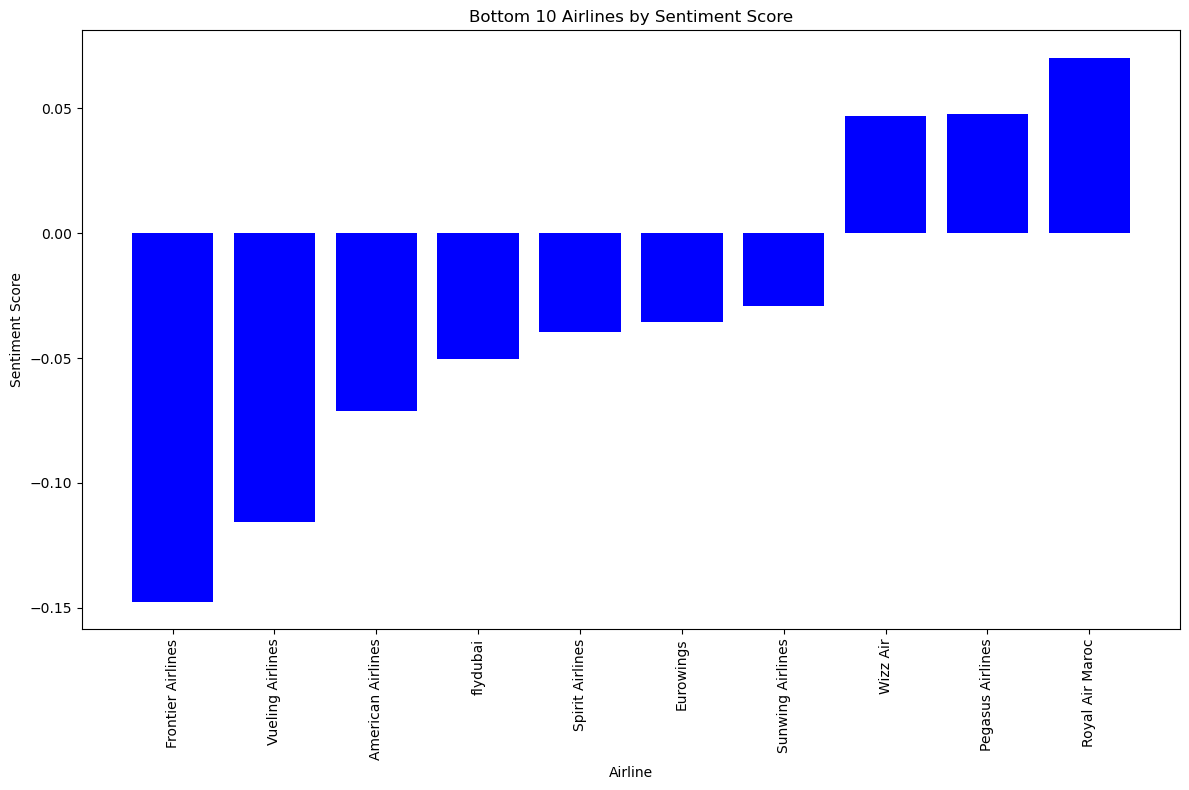

In [33]:

# Get the top 10 airlines based on sentiment scores
top_10_airlines = final_score.nsmallest(10, 'sentiment_score')

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(top_10_airlines.index, top_10_airlines['sentiment_score'], color='blue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Airline')
plt.ylabel('Sentiment Score')
plt.title('Bottom 10 Airlines by Sentiment Score')
plt.tight_layout()

plt.show()

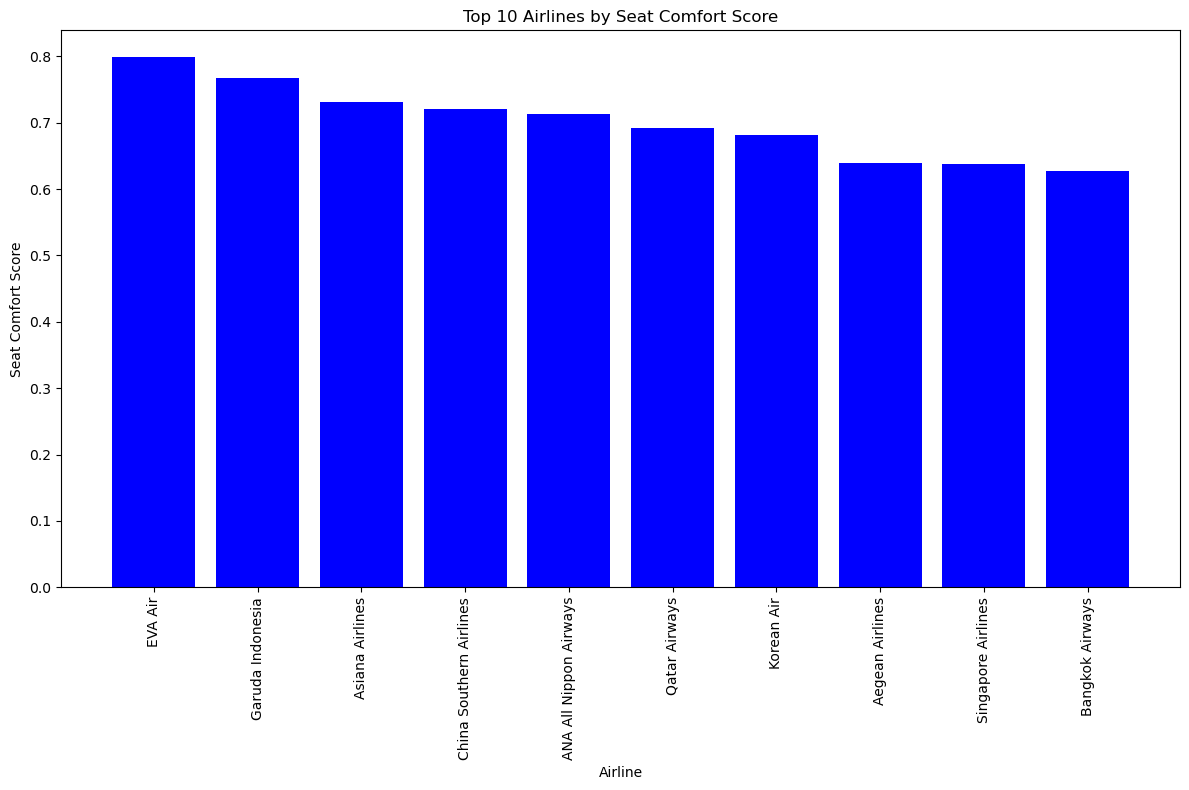

In [31]:

# Get the top 10 airlines based on sentiment scores
top_10_airlines = final_score.nlargest(10, 'seat_comfort')

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(top_10_airlines.index, top_10_airlines['seat_comfort'], color='blue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Airline')
plt.ylabel('Seat Comfort Score')
plt.title('Top 10 Airlines by Seat Comfort Score')
plt.tight_layout()

plt.show()


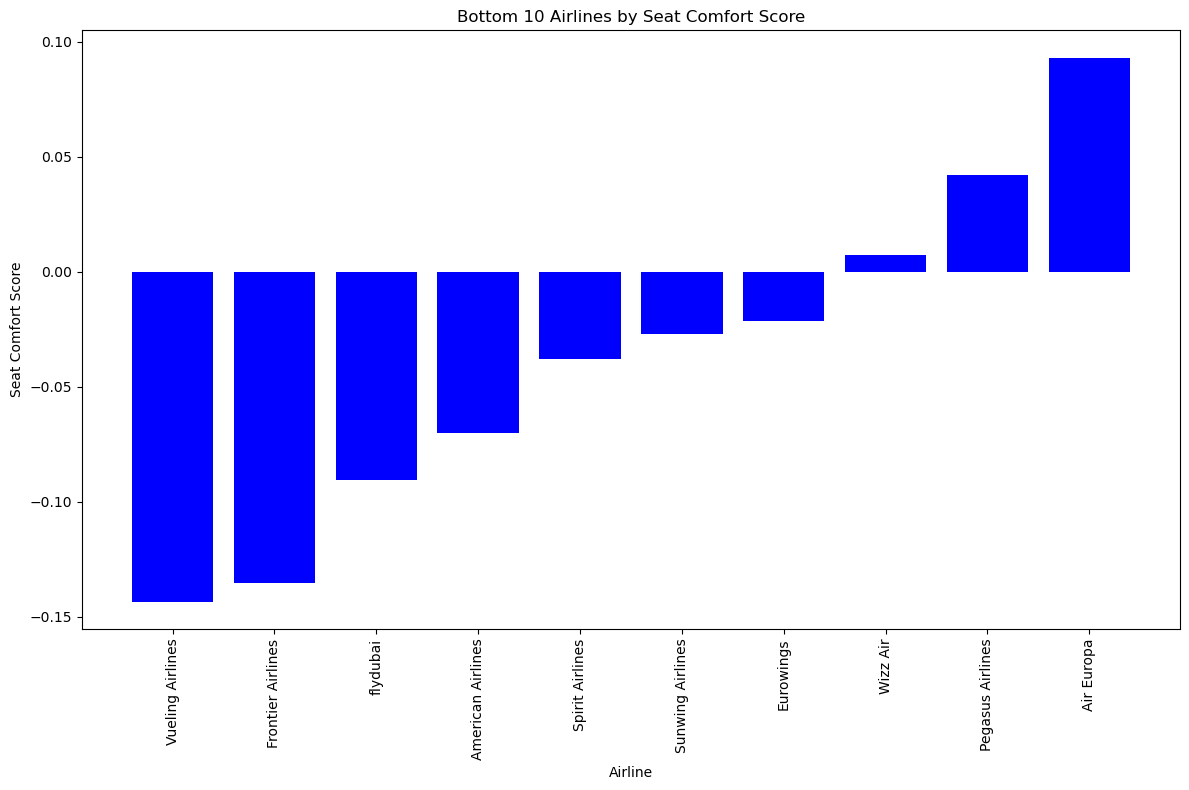

In [32]:

# Get the top 10 airlines based on sentiment scores
top_10_airlines = final_score.nsmallest(10, 'seat_comfort')

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(top_10_airlines.index, top_10_airlines['seat_comfort'], color='blue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Airline')
plt.ylabel('Seat Comfort Score')
plt.title('Bottom 10 Airlines by Seat Comfort Score')
plt.tight_layout()

plt.show()

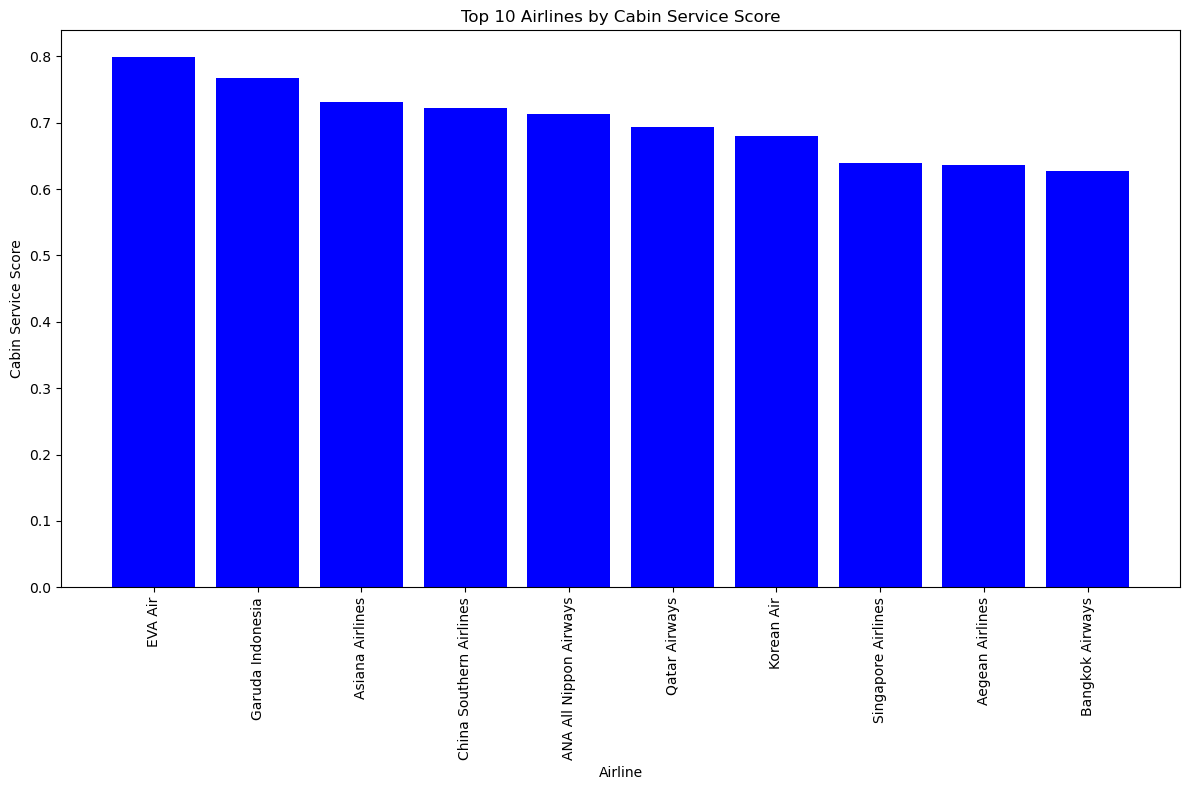

In [34]:

# Get the top 10 airlines based on sentiment scores
top_10_airlines = final_score.nlargest(10, 'cabin_service')

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(top_10_airlines.index, top_10_airlines['cabin_service'], color='blue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Airline')
plt.ylabel('Cabin Service Score')
plt.title('Top 10 Airlines by Cabin Service Score')
plt.tight_layout()

plt.show()


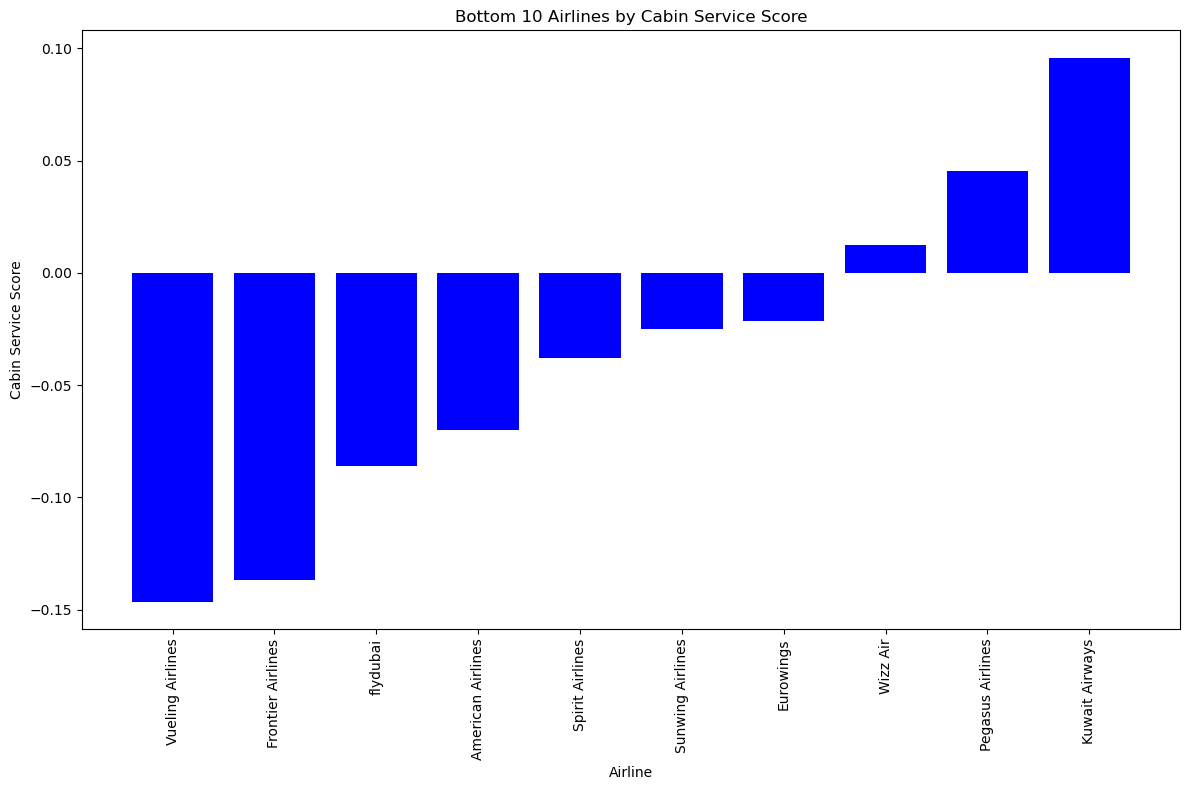

In [35]:

# Get the top 10 airlines based on sentiment scores
top_10_airlines = final_score.nsmallest(10, 'cabin_service')

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(top_10_airlines.index, top_10_airlines['cabin_service'], color='blue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Airline')
plt.ylabel('Cabin Service Score')
plt.title('Bottom 10 Airlines by Cabin Service Score')
plt.tight_layout()

plt.show()

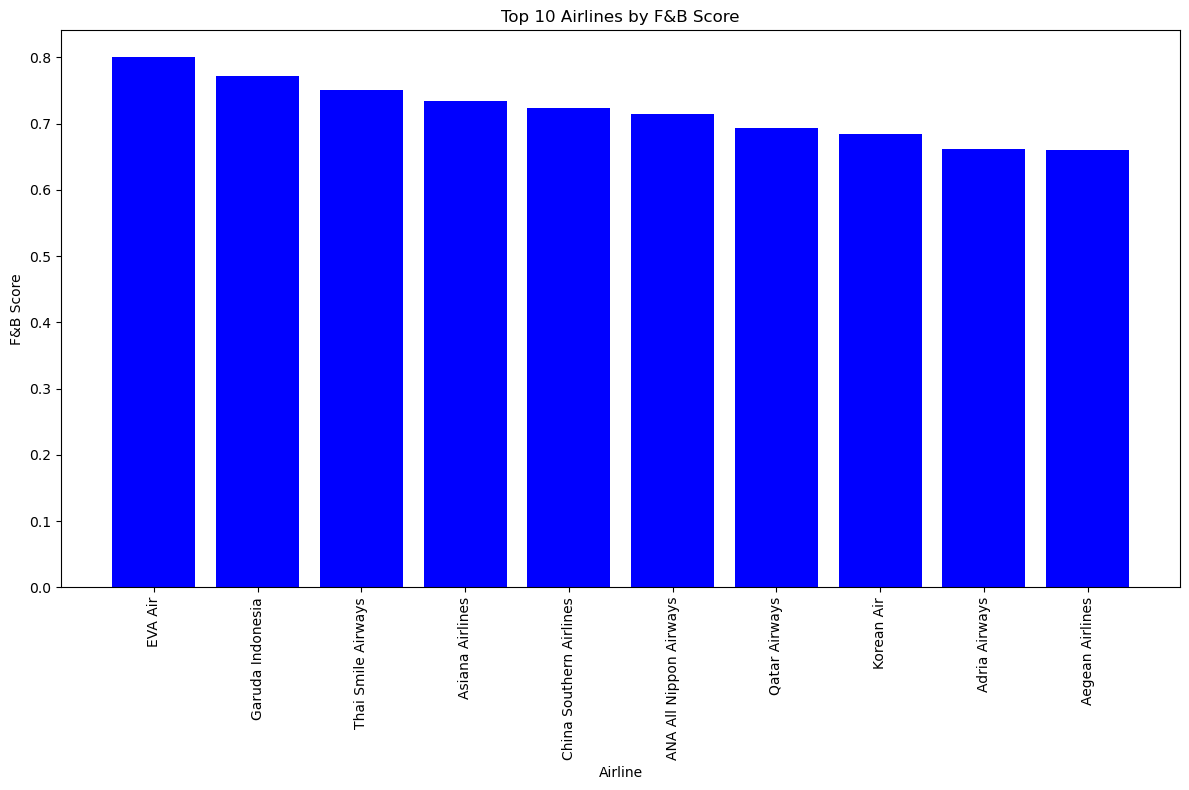

In [36]:

# Get the top 10 airlines based on sentiment scores
top_10_airlines = final_score.nlargest(10, 'food_bev')

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(top_10_airlines.index, top_10_airlines['food_bev'], color='blue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Airline')
plt.ylabel('F&B Score')
plt.title('Top 10 Airlines by F&B Score')
plt.tight_layout()

plt.show()


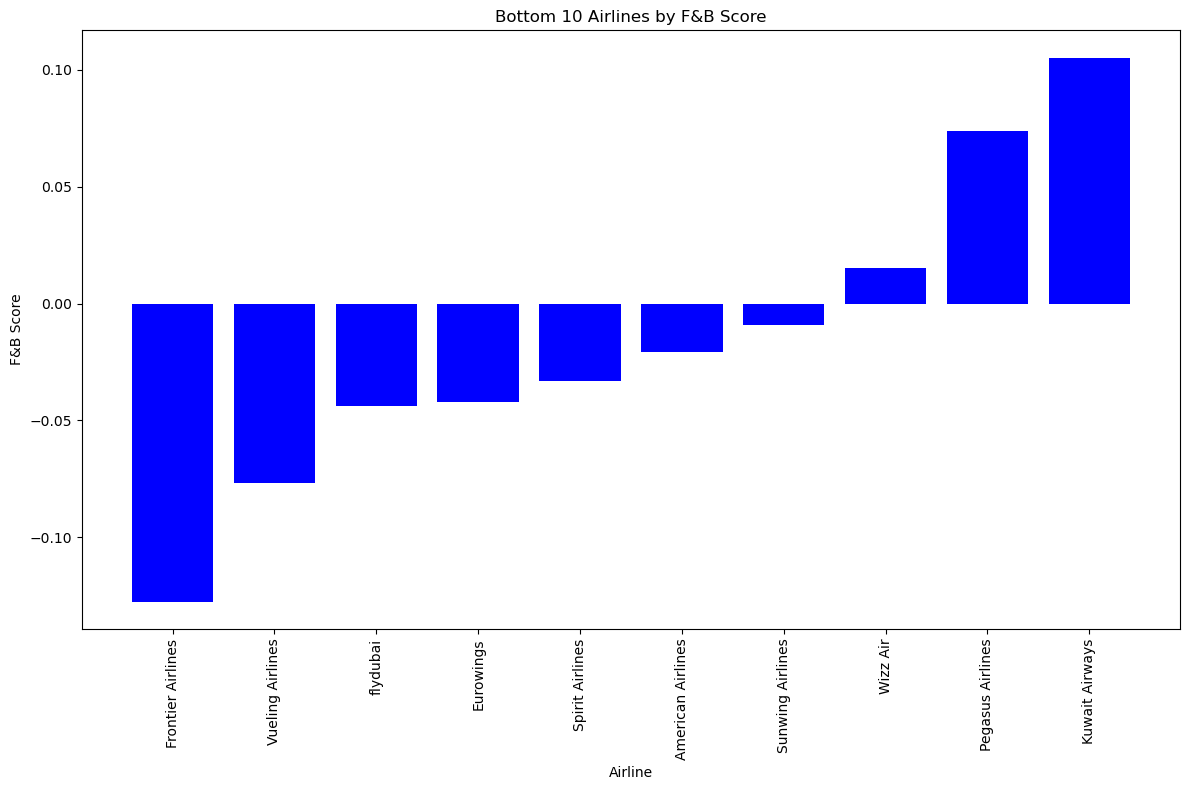

In [37]:

# Get the top 10 airlines based on sentiment scores
top_10_airlines = final_score.nsmallest(10, 'food_bev')

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(top_10_airlines.index, top_10_airlines['food_bev'], color='blue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Airline')
plt.ylabel('F&B Score')
plt.title('Bottom 10 Airlines by F&B Score')
plt.tight_layout()

plt.show()

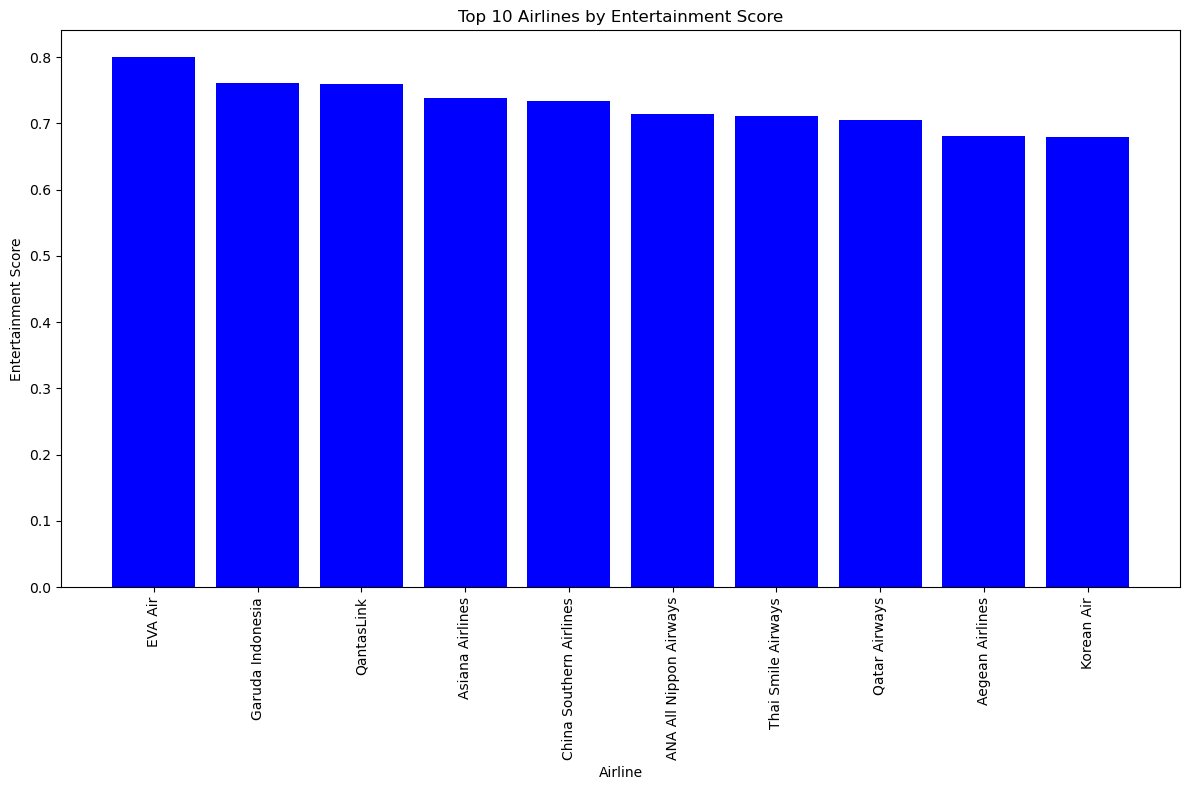

In [38]:

# Get the top 10 airlines based on sentiment scores
top_10_airlines = final_score.nlargest(10, 'entertainment')

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(top_10_airlines.index, top_10_airlines['entertainment'], color='blue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Airline')
plt.ylabel('Entertainment Score')
plt.title('Top 10 Airlines by Entertainment Score')
plt.tight_layout()

plt.show()


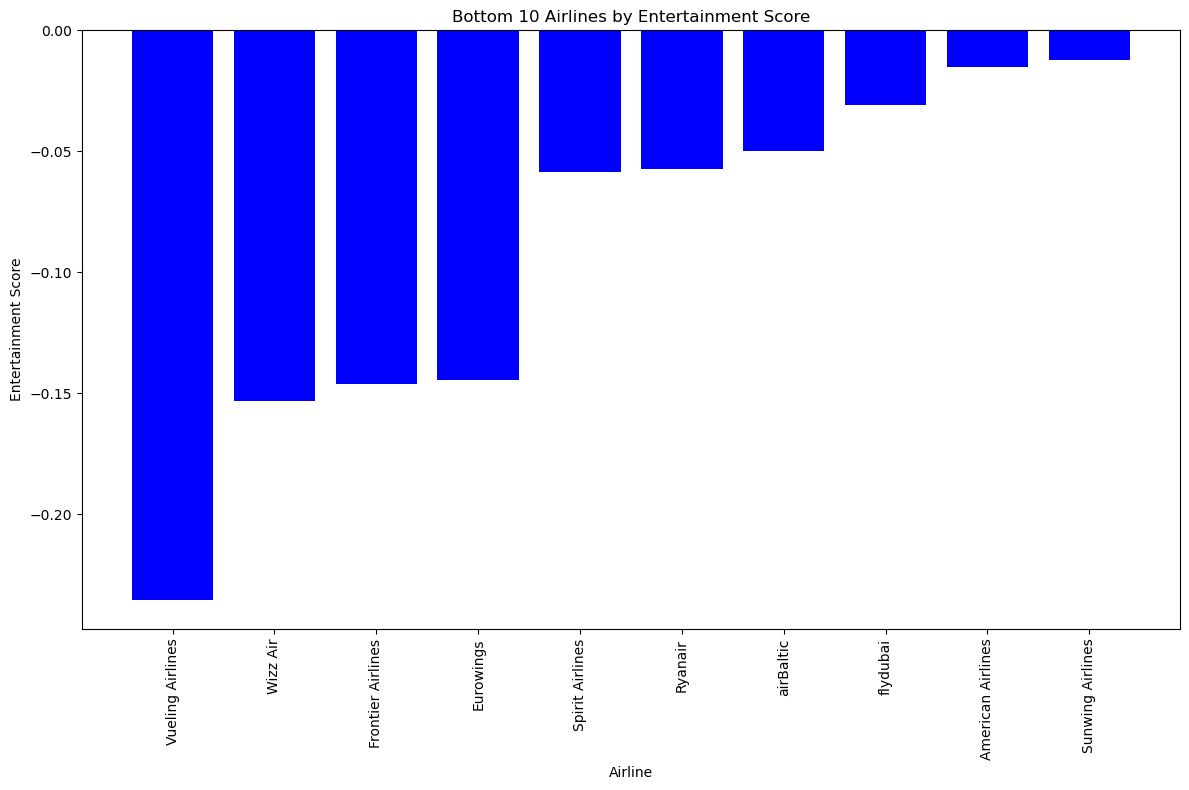

In [39]:

# Get the top 10 airlines based on sentiment scores
top_10_airlines = final_score.nsmallest(10, 'entertainment')

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(top_10_airlines.index, top_10_airlines['entertainment'], color='blue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Airline')
plt.ylabel('Entertainment Score')
plt.title('Bottom 10 Airlines by Entertainment Score')
plt.tight_layout()

plt.show()

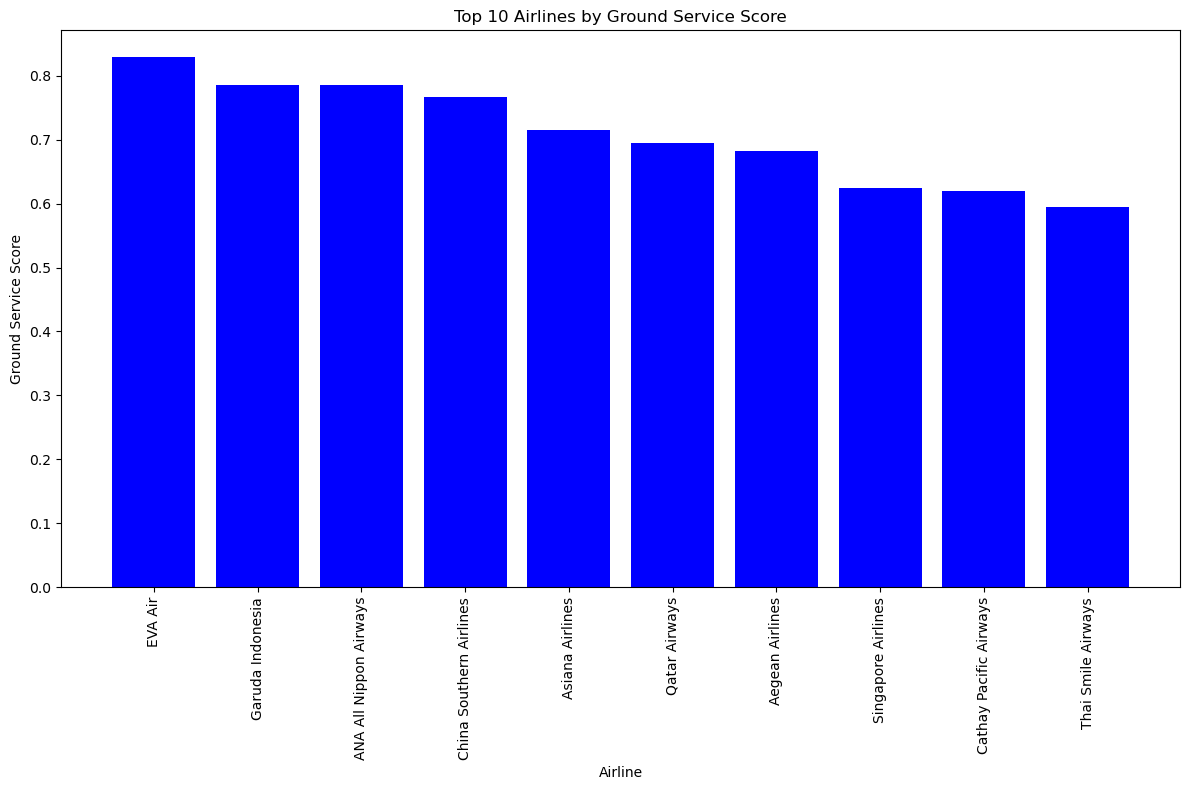

In [40]:

# Get the top 10 airlines based on sentiment scores
top_10_airlines = final_score.nlargest(10, 'ground_service')

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(top_10_airlines.index, top_10_airlines['ground_service'], color='blue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Airline')
plt.ylabel('Ground Service Score')
plt.title('Top 10 Airlines by Ground Service Score')
plt.tight_layout()

plt.show()


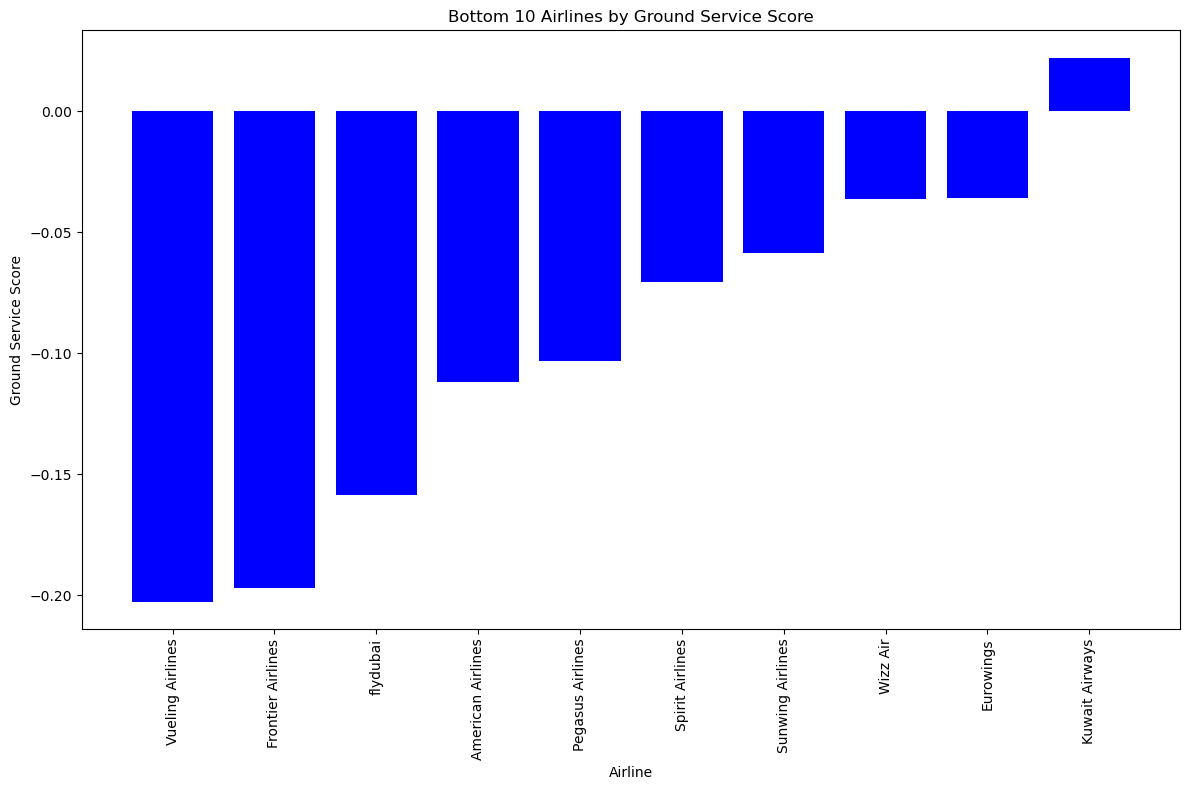

In [41]:

# Get the top 10 airlines based on sentiment scores
top_10_airlines = final_score.nsmallest(10, 'ground_service')

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(top_10_airlines.index, top_10_airlines['ground_service'], color='blue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Airline')
plt.ylabel('Ground Service Score')
plt.title('Bottom 10 Airlines by Ground Service Score')
plt.tight_layout()

plt.show()

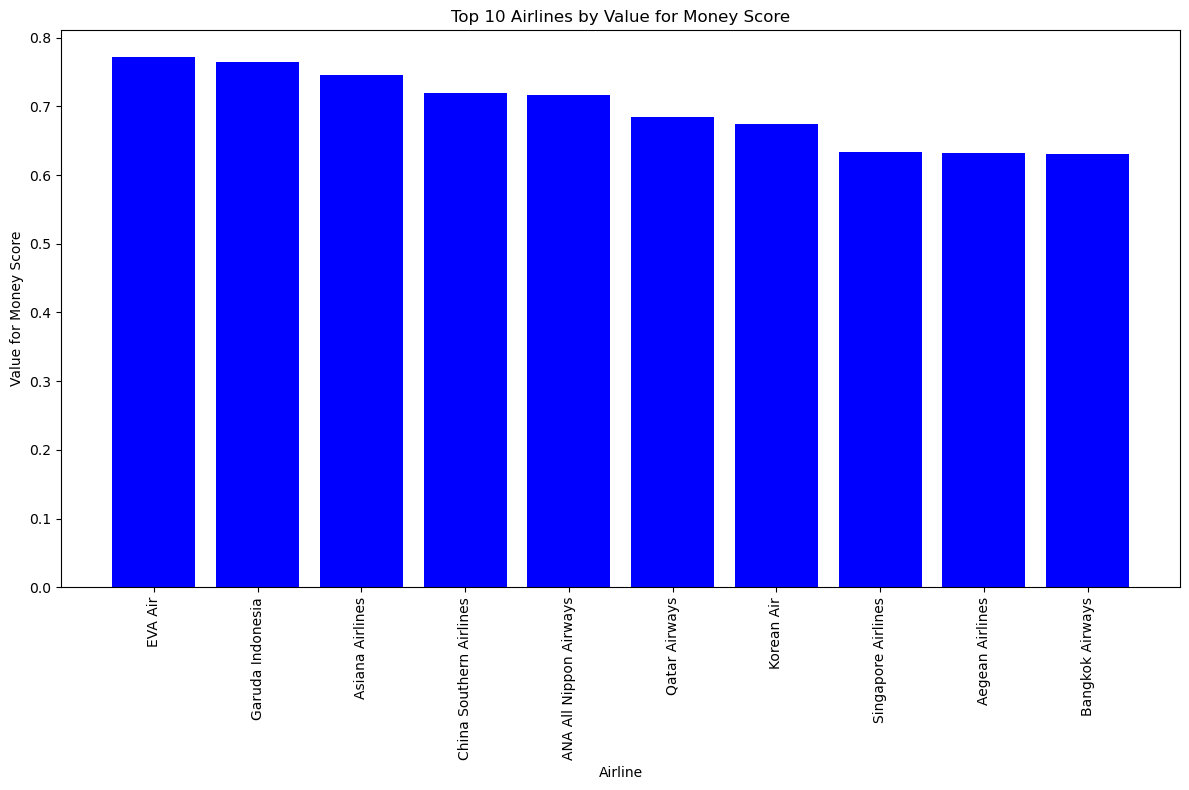

In [42]:

# Get the top 10 airlines based on sentiment scores
top_10_airlines = final_score.nlargest(10, 'value_for_money')

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(top_10_airlines.index, top_10_airlines['value_for_money'], color='blue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Airline')
plt.ylabel('Value for Money Score')
plt.title('Top 10 Airlines by Value for Money Score')
plt.tight_layout()

plt.show()


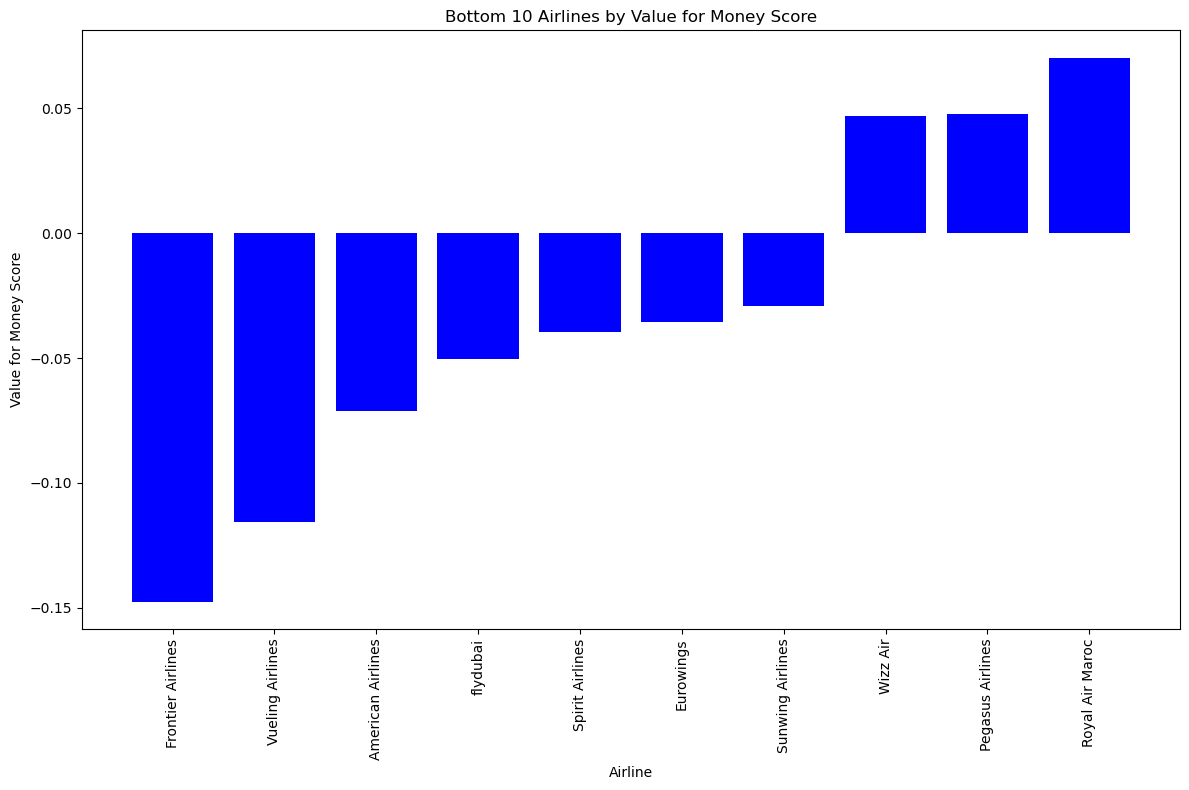

In [43]:

# Get the top 10 airlines based on sentiment scores
top_10_airlines = final_score.nsmallest(10, 'value_for_money')

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(top_10_airlines.index, top_10_airlines['value_for_money'], color='blue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Airline')
plt.ylabel('Value for Money Score')
plt.title('Bottom 10 Airlines by Value for Money Score')
plt.tight_layout()

plt.show()

In [44]:
final_score

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,sentiment_score
airline,,,,,,,
ANA All Nippon Airways,0.713757,0.713757,0.715177,0.714627,0.785435,0.716486,0.716486
Adria Airways,0.530590,0.530590,0.661703,0.655725,0.347861,0.574724,0.574724
Aegean Airlines,0.639473,0.636977,0.660268,0.680428,0.682557,0.632710,0.632710
Aer Lingus,0.424566,0.428627,0.451355,0.433040,0.332158,0.447915,0.447915
Aeroflot Russian Airlines,0.475871,0.478264,0.495875,0.493240,0.387072,0.452306,0.452306
...,...,...,...,...,...,...,...
WOW air,0.302360,0.303717,0.270647,0.251302,0.266282,0.287178,0.287178
Wizz Air,0.007163,0.012256,0.015441,-0.153036,-0.036135,0.046790,0.046790
airBaltic,0.174859,0.167299,0.222422,-0.049730,0.195242,0.219770,0.219770


In [45]:
df_cleaned

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,preprocessed_review,sentiment_score
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes,âœ trip verified london izmir via istanbul fir...,0.9403
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no,âœ trip verified istanbul bucharest make check...,0.2732
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no,âœ trip verified rome prishtina via istanbul f...,-0.9515
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,âœ trip verified flew turkish airlines iadistk...,0.9764
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no,âœ trip verified mumbai dublin via istanbul ne...,-0.2654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,two domestic flights kiev lviv last week troub...,0.7963
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,good flight london kiev ukraine international ...,0.7351
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,kiev london gatwick business class april flown...,0.1523
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,several flights kbp ams 3 times one way lgw rt...,0.3818
